<a href="https://colab.research.google.com/github/plaban1981/Huggingface_transformers_course/blob/main/Huggingface_Sentence_transformer__classify_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks.

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.5MB 10.0MB/s 
     |████████████████████████████████| 901kB 42.6MB/s 
     |████████████████████████████████| 3.3MB 35.0MB/s 


## sentence-transformers/bert-base-nli-mean-tokens
This is a sentence-transformers model: It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 92kB 5.3MB/s 
     |████████████████████████████████| 1.2MB 12.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-cp37-none-any.whl size=126711 sha256=5857eaa2c81b1f3bc77080057117d032e35fe24a025d9a2173feed8367fbb352
  Stored in directory: /root/.cache/pip/wheels/38/d2/98/d191289a877a34c68aa67e05179521e060f96394a3e9336be6
Successfully built sentence-transformers


## Sentence Transformers -Distilbert

## Read Training Data

In [ ]:
!wget "https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label"  -O newfile.txt

--2021-07-11 16:49:28--  https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label
Resolving cogcomp.seas.upenn.edu (cogcomp.seas.upenn.edu)... 158.130.57.77
Connecting to cogcomp.seas.upenn.edu (cogcomp.seas.upenn.edu)|158.130.57.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335858 (328K)
Saving to: ‘newfile.txt’

newfile.txt         100%[===================>] 327.99K  1.01MB/s    in 0.3s    

2021-07-11 16:49:29 (1.01 MB/s) - ‘newfile.txt’ saved [335858/335858]



## Seggregate Label and Text

In [ ]:
label = []
question = []
with open("/content/newfile.txt","r",encoding="ISO-8859-1") as f:
  for line in f.readlines():
    text = line.split(":")
    label.append(text[0])
    question.append(text[1])

## Get the data into DataFrame

In [ ]:
train = pd.DataFrame({'Question':question,'Label':label})

In [ ]:
train.head()

,Question,Label
0,manner How did serfdom develop in and then lea...,DESC
1,cremat What films featured the character Popey...,ENTY
2,manner How can I find a list of celebrities ' ...,DESC
3,animal What fowl grabs the spotlight after the...,ENTY
4,exp What is the full form of .com ?\n,ABBR


## Using Transformer Pipeline

In [ ]:
model = SentenceTransformer('sentence-transformers/distilbert-base-nli-mean-tokens')
embeddings = model.encode(sentences)
print(embeddings)

[[-1.2805133  -0.47905654 -0.07459314 ... -0.6903942   0.65552545
   0.4299319 ]
 [ 0.05076515 -0.2315884   0.44918177 ... -0.9458779   0.58218247
   0.16936484]
 [ 0.16578268  0.08628527  0.99605757 ... -1.4010975  -0.16692434
  -0.66698927]
 ...
 [-0.4809268  -0.33031234  0.902013   ... -0.7185601   0.3793425
  -0.61258334]
 [ 0.16263308  0.17402235  0.30849615 ... -0.4745843   0.4362693
  -0.6093792 ]
 [-0.23205915 -0.5019506  -0.1751888  ... -0.3825056   0.41391864
  -0.66173697]]


* The data we pass between the two models is a vector of size 768. We can think of this of vector as an embedding for the sentence that we can use for classification.

In [ ]:
train_vector = pd.DataFrame(np.array(sentence_embeddings))

In [ ]:
train_vector.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,-0.032483,-1.037481,-0.430439,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,-0.759870,-0.319705,-0.320549,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.288382,0.158904,-0.675779,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-1.323599,-0.134632,-0.420600,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.935546,0.314507,-0.171532,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427,-0.521123,0.406643,0.222614,-0.539807,-0.619525,0.157020,-0.941711,-0.363686,0.716169,-0.360151,-0.008979,-0.696636,-0.872138,0.

## Concat genereated word Vector aloing with the original text and label

In [ ]:
final_train = pd.concat((train_vector,train),axis=1)

In [ ]:
final_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Question,Label
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,-0.430439,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932,manner How did serfdom develop in and then lea...,DESC
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,-0.320549,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365,cremat What films featured the character Popey...,ENTY
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.675779,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990,manner How can I find a list of celebrities ' ...,DESC
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-0.420600,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413,animal What fowl grabs the spotlight after the...,ENTY
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.171532,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427

## Visualize the distribution of the Labels

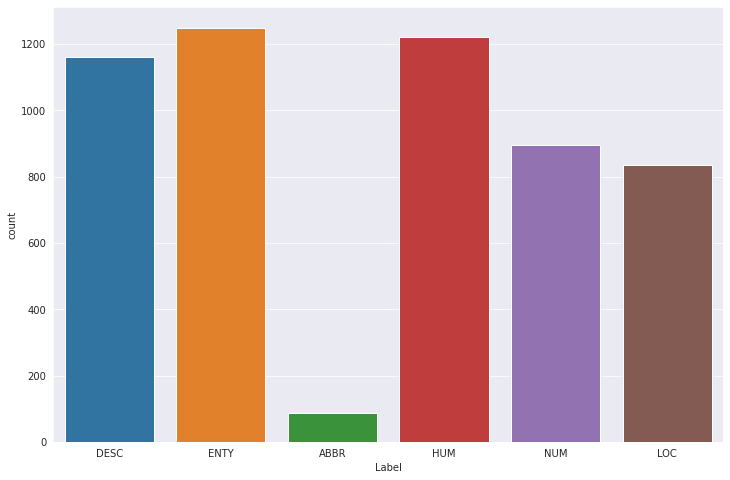

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(x='Label',data=final_train)

## Import Machine Learning Packages

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *


## Label encoding the target (Label)

In [ ]:
lb = LabelEncoder()
lbl_encoded = lb.fit_transform(final_train['Label'])
lb.classes_

array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM'], dtype=object)

In [ ]:
final_train['Label_enc'] = lbl_encoded 
final_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Question,Label,Label_enc
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932,manner How did serfdom develop in and then lea...,DESC,1
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365,cremat What films featured the character Popey...,ENTY,2
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990,manner How can I find a list of celebrities ' ...,DESC,1
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413,animal What fowl grabs the spotlight after the...,ENTY,2
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427,-0.521123,0.406643,0.222614,-0.5398

## Derive Independent and Dependent feature from the training Sample

In [ ]:
features = final_train.drop(['Question','Label','Label_enc'],axis=1)
lbls = final_train['Label_enc']

In [ ]:
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,-0.032483,-1.037481,-0.430439,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,-0.759870,-0.319705,-0.320549,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.288382,0.158904,-0.675779,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-1.323599,-0.134632,-0.420600,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.935546,0.314507,-0.171532,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427,-0.521123,0.406643,0.222614,-0.539807,-0.619525,0.157020,-0.941711,-0.363686,0.716169,-0.360151,-0.008979,-0.696636,-0.872138,0.

## Split the training sample into Training and validation Sample

In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(features,lbls,test_size=0.15,stratify=lbls)

In [ ]:
X_train.shape,X_val.shape

((4634, 768), (818, 768))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Build Model - LogisticRegression

In [ ]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Validation  Predictions accuracy

In [ ]:
y_pred = lr.predict(X_val)
accuracy_score(y_pred,Y_val)

0.8899755501222494

## Applying Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
temp = features
target = lbls
scores = []
scores_val = []

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8817598533455545


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8918423464711274


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8788990825688073


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8752293577981651


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8926605504587156
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.8752293577981651 0.8926605504587156 0.884078238128474


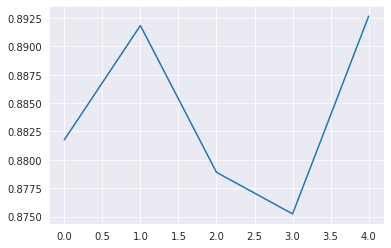

In [ ]:
for train_index,test_index in skf.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = LogisticRegression(multi_class='ovr')

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(accuracy_score(ytest,preds))
        scores.append(accuracy_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Make Predictions on validation Data

In [ ]:
final_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Question,Label,Label_enc
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932,manner How did serfdom develop in and then lea...,DESC,1
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365,cremat What films featured the character Popey...,ENTY,2
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990,manner How can I find a list of celebrities ' ...,DESC,1
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413,animal What fowl grabs the spotlight after the...,ENTY,2
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427,-0.521123,0.406643,0.222614,-0.5398

## Doing the split again to asociate the questions and corresponding labels with the training and validation sample

In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(final_train.drop('Label_enc',axis=1),final_train['Label_enc'],test_size=0.15,stratify=final_train['Label_enc'])

In [ ]:
X_val_new = X_val.drop(['Question','Label'],axis=1)

In [ ]:
y_pred = model.predict(X_val_new)

In [ ]:
len(y_pred )

818

## Confusion Matrix

#### Label Mapping
**{0: 'ABBR', 1: 'DESC', 2: 'ENTY', 3: 'HUM', 4: 'LOC', 5: 'NUM'}**

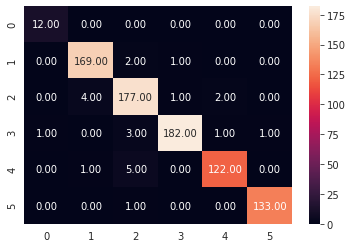

In [ ]:
sns.heatmap(confusion_matrix(y_pred,Y_val),annot=True,fmt=".2f")

## Retrieve Prediction Probabilities for Each Class

In [ ]:
pred_proba = model.predict_proba(X_val_new)

In [ ]:
pred_proba 

array([[1.67967062e-05, 1.37483021e-04, 2.91446292e-02, 9.69867262e-01,
        7.78579392e-04, 5.52492925e-05],
       [2.63708398e-04, 9.54780874e-01, 3.13930487e-02, 1.30276628e-02,
        8.78448417e-07, 5.33827550e-04],
       [3.84414741e-04, 9.79077547e-01, 1.11563144e-03, 1.43318551e-04,
        3.21376154e-05, 1.92469510e-02],
       ...,
       [1.19282102e-06, 2.70288272e-02, 9.67846654e-01, 4.59445779e-03,
        3.72649310e-04, 1.56219290e-04],
       [2.00835630e-03, 2.65582968e-01, 6.40111163e-04, 7.31531580e-01,
        2.36023718e-04, 9.60893969e-07],
       [1.53236552e-04, 3.04565392e-01, 6.95252435e-01, 5.90478023e-07,
        2.79649340e-05, 3.81095755e-07]])

## Store the prediction Probabilities into a DataFrame

In [ ]:
df_pred = pd.DataFrame(pred_proba,columns=lb.classes_)

In [ ]:
df_pred

,ABBR,DESC,ENTY,HUM,LOC,NUM
0,0.000017,0.000137,0.029145,9.698673e-01,7.785794e-04,5.524929e-05
1,0.000264,0.954781,0.031393,1.302766e-02,8.784484e-07,5.338276e-04
2,0.000384,0.979078,0.001116,1.433186e-04,3.213762e-05,1.924695e-02
3,0.000365,0.050993,0.000029,1.272275e-04,7.109687e-03,9.413756e-01
4,0.000002,0.067660,0.000145,3.754166e-04,3.048897e-05,9.317863e-01
...,...,...,...,...,...,...
813,0.000229,0.000865,0.966235,9.330449e-07,4.361736e-04,3.223346e-02
814,0.000562,0.843561,0.155315,4.833663e-04,2.483263e-05,5.369831e-05
815,0.000001,0.027029,0.967847,4.594458e-03,3.726493e-04,1.562193e-04
816,0.002008,0.265583,0.000640,7.315316e-01,2.360237e-04,9.608940e-07


## Formatting the Validation Data

In [ ]:
X_val[['Question','Label']]

,Question,Label
4197,ind Who killed Martin Luther King ?\n,HUM
5127,def What is fellatio ?\n,DESC
4449,manner How do they get Teflon to stick to the ...,DESC
4439,dist How tall is the Matterhorn ?\n,NUM
1706,count How many people were executed for Abraha...,NUM
...,...,...
694,sport In what sport are these following number...,ENTY
3171,desc What happens to used motor oil ?\n,DESC
2538,color What is your favorite color ?\n,ENTY
2076,gr What court does Bob Woodward describe in Th...,HUM


In [ ]:
predictions_made = X_val[['Question','Label']].copy()

In [ ]:
predictions_made['Label_Predicted'] = y_pred

In [ ]:
predictions_made.head()

,Question,Label,Label_Predicted
4197,ind Who killed Martin Luther King ?\n,HUM,3
5127,def What is fellatio ?\n,DESC,1
4449,manner How do they get Teflon to stick to the ...,DESC,1
4439,dist How tall is the Matterhorn ?\n,NUM,5
1706,count How many people were executed for Abraha...,NUM,5


In [ ]:
predictions_made['Label_Predicted'].unique()

array([3, 1, 5, 2, 4, 0])

## Generate Label Mapper

In [ ]:
mapper = {k:v for k,v in enumerate(lb.classes_.tolist())}
mapper 

{0: 'ABBR', 1: 'DESC', 2: 'ENTY', 3: 'HUM', 4: 'LOC', 5: 'NUM'}

In [ ]:
predictions_made['Label_Predicted'] = predictions_made['Label_Predicted'].map(mapper)

In [ ]:
predictions_made.reset_index(inplace=True)

In [ ]:
predictions_made = predictions_made.drop('index',axis=1)
predictions_made.head()

,Question,Label,Label_Predicted
0,ind Who killed Martin Luther King ?\n,HUM,HUM
1,def What is fellatio ?\n,DESC,DESC
2,manner How do they get Teflon to stick to the ...,DESC,DESC
3,dist How tall is the Matterhorn ?\n,NUM,NUM
4,count How many people were executed for Abraha...,NUM,NUM


In [ ]:
final_validation_preds = pd.concat((predictions_made,df_pred),axis=1)

In [ ]:
final_validation_preds.head()

,Question,Label,Label_Predicted,ABBR,DESC,ENTY,HUM,LOC,NUM
0,ind Who killed Martin Luther King ?\n,HUM,HUM,0.000017,0.000137,0.029145,0.969867,7.785794e-04,0.000055
1,def What is fellatio ?\n,DESC,DESC,0.000264,0.954781,0.031393,0.013028,8.784484e-07,0.000534
2,manner How do they get Teflon to stick to the ...,DESC,DESC,0.000384,0.979078,0.001116,0.000143,3.213762e-05,0.019247
3,dist How tall is the Matterhorn ?\n,NUM,NUM,0.000365,0.050993,0.000029,0.000127,7.109687e-03,0.941376
4,count How many people were executed for Abraha...,NUM,NUM,0.000002,0.067660,0.000145,0.000375,3.048897e-05,0.931786


##Make Predictions on unseen data sample

In [ ]:
import pickle

In [77]:
TEST.head()

,S.No.,Question,Actual Label,Predicted Label,ABBR,DESC,ENTY,HUM,LOC,NUM
0,1,Who is Genpact's CEO ?,HUM,HUM,2.144840e-03,0.000738,0.000003,0.996844,0.000040,0.000231
1,2,What was the diluted earnings per share for Ge...,NUM,NUM,3.358860e-07,0.000081,0.208753,0.090547,0.000074,0.700545
2,3,What was the final verdict in Pralipsa Rout vs...,DESC,DESC,3.685663e-04,0.829172,0.035295,0.000720,0.000011,0.134433
3,4,What is the court’s’ notice number that allows...,NUM,ENTY,3.143958e-05,0.150287,0.836988,0.000925,0.008959,0.002809
4,5,What are the components in the monthly gross s...,DESC/ENTY,NUM,1.023865e-06,0.005718,0.004760,0.000311,0.000025,0.989185


In [86]:
class process_test_data():
  def __init__(self,file_path,model_path):
    self.file_path = file_path
    self.model_path = model_path
  def read_data(self):
    TEST = pd.read_excel(self.file_path)
    TEST = TEST.rename(columns={'Query':'Question'})
    print(TEST.shape)
  def generate_vectors(self):
    self.sentence_list = TEST.Question.values.tolist()
    model = SentenceTransformer('sentence-transformers/distilbert-base-nli-mean-tokens')
    embeddings = model.encode(self.sentence_list)
    print(len(embeddings))
    self.train_vector = pd.DataFrame(np.array(embeddings))
    print(self.train_vector.shape)
  def load_and_predict(self):
    loaded_model = pickle.load(open(self.model_path , 'rb'))
    predictions = loaded_model.predict(self.train_vector)
    print(len(predictions))
    TEST['Predicted Labels'] = predictions
    return TEST
 



In [87]:
file_path = "/content/TestSet_QueryClassification.xlsx"
model_path = "/content/drive/MyDrive/AV_Hack/Logistic_regression.pkl"
testdata = process_test_data(file_path,model_path)
testdata.read_data()
testdata.generate_vectors()
df= testdata.load_and_predict()

(20, 3)
20
(20, 768)
20


In [74]:
predictions

array([1, 2, 1, ..., 5, 5, 2])